In [1]:
import pandas as pd
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt
#df1 = pd.read_csv('/fs/ess/PCON0041/xiaohu/t5chem/models/new/predictions.csv')
#t5target = df1['target']
#t5pred = df1['prediction']


data2 = torch.load('/fs/ess/PCON0041/xiaohu/MAT/results/final/uspto_new_wsigmoid/sample_cj_testmodels/test_result.pt',map_location=torch.device('cpu'))
ourtarget = np.array(data2[:,1]) 
ourpred = np.array(data2[:,0]) 

##reactions = pd.read_csv('/fs/ess/PCON0041/xiaohu/MAT/Data/BH/BH_processed.csv').loc[test_index].values
#N = reactions.shape[0]
#print(reactions[:,5])

import scipy
import torch
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(ourtarget, ourpred)      
MSE = mean_squared_error(ourtarget, ourpred)
slope, intercept, r_value, p_value, std_err =   scipy.stats.linregress(ourtarget, ourpred)
print("MAE: {}    RMSE: {}    r2: {}    r:{}".format(MAE, MSE**0.5, r_value**2, r_value))

/users/PCON0041/xiaohu/anaconda3/envs/t5chem/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


MAE: 0.1491738259792328    RMSE: 0.18790851238226752    r2: 0.009269783383164273    r:0.09627971428688534


In [3]:
import pandas as pd
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt
df1 = pd.read_csv('/fs/ess/PCON0041/xiaohu/MAT/t5chem_results/uspto500mt/predictions_cjhif.csv')
t5target = df1['target'] / 100
t5pred = df1['prediction'] / 100

In [4]:
import scipy
import torch
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(t5target, t5pred)      
MSE = mean_squared_error(t5target, t5pred)
slope, intercept, r_value, p_value, std_err =   scipy.stats.linregress(t5target, t5pred)
print("MAE: {}    RMSE: {}    r2: {}    r:{}".format(MAE, MSE**0.5, r_value**2, r_value))

MAE: 0.17945552799224854    RMSE: 0.23334756830303266    r2: 0.02588906702092136    r:0.16090079869572232


In [5]:
import numpy as np

t5abs_err = np.abs(t5target - t5pred) 
t5mae = np.mean(np.abs(t5target - t5pred))
print("t5 Mean Absolute Error:", t5mae)
 
ourabs_err = np.abs(ourtarget - ourpred) 
ourmae = np.mean(np.abs(ourtarget - ourpred))
print("Our Mean Absolute Error:", ourmae)

#ourabs_err1 = np.abs(t5target - ourpred) 
#ourmae1 = np.mean(np.abs(t5target - ourpred))
#print("Our Mean Absolute Error:", ourmae1)

t5 Mean Absolute Error: 0.17945552799224854
Our Mean Absolute Error: 0.14917383


0.18455059317110856 0.21474478483200077
0.0473078813527585 0.1396866059303284
0.4085687408512958 0.04330056428909301
0.2681735631252635 0.059467290242513016
0.9259054632629713 -0.004158273795071721
0.1525358523575514 0.0300428040285369
0.007580971420873245 -0.04042442888021466
3.210413385701494e-14 -0.08633228020874528
4.14665016751419e-07 -0.04487542987988663
0.04148318809763935 -0.016098078828699486


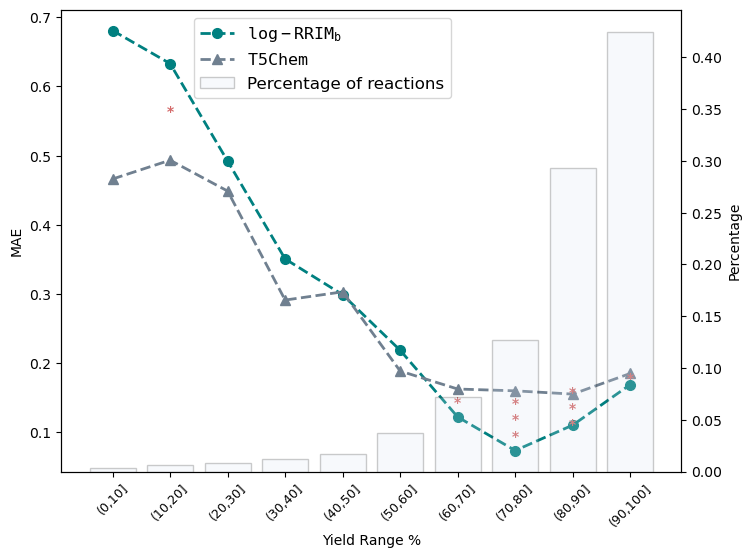

In [6]:
reactions = pd.read_csv('/fs/ess/PCON0041/xiaohu/MAT/Data/sample_CJHIF/sample_test_CJ_processed_final_5w_wo0.csv').values
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

#plt.rcParams.update({
#   "text.usetex": True,
    #"font.family": 'Times New Roman'
#})
plt.rcParams['font.size'] = 10
# Example data initialization (replace with your actual data)
our_color = '#008080'
t5_color = '#708090'
back_color = '#D9E4F1'
yield_range = np.array([[-1, 10], [10, 20], [20, 30], [30, 40], [40, 50], [50, 60], [60, 70], [70, 80], [80, 90], [90, 100]]) / 100
d = yield_range.shape[0]
our_grid_mae = np.zeros((d,1))
our_grid_mae_w = np.zeros((d,1))
t5_grid_mae = np.zeros((d,1))
our_grid_mae_std = np.zeros((d))
t5_grid_mae_std = np.zeros((d))
amount = np.zeros((d,1))
x = np.arange(d)
p_values = np.zeros(d)

# Sample data (replace with actual data processing code)
for i in range(d):
    index1 = np.where(t5target > yield_range[i][0])[0]
    index2 = np.where(t5target <= yield_range[i][1])[0]    
    intersect_index = list(set(index1) & set(index2))
    our_grid_mae[i][0] = np.mean(ourabs_err[intersect_index])
    #our_grid_mae_w[i][0] = np.mean(ourabs_err_w[intersect_index])
    t5_grid_mae[i][0] = np.mean(t5abs_err[intersect_index])
    our_grid_mae_std[i] = np.std(ourabs_err[intersect_index])
    t5_grid_mae_std[i] = np.std(t5abs_err[intersect_index])
    amount[i][0] = len(intersect_index)

    p_values[i] = scipy.stats.ttest_rel(ourabs_err[intersect_index], t5abs_err[intersect_index])[1]
    print(p_values[i], our_grid_mae[i][0]-t5_grid_mae[i][0])

our_grid_mae = our_grid_mae.reshape(-1)
#our_grid_mae_w = our_grid_mae_w.reshape(-1)
t5_grid_mae = t5_grid_mae.reshape(-1)

    

# Plotting
fig, ax1 = plt.subplots(figsize=(8,6))
ax2 = ax1.twinx()

# Bar plot
bar = ax2.bar(x, amount.flatten() / amount.sum(), color=back_color, edgecolor='black', alpha=0.2, label='Percentage of reactions')

# Line plots
line1, = ax1.plot(x, our_grid_mae, color=our_color, linestyle='--', linewidth=2, marker='o', ms=7, label='$\mathtt{log-RRIM_{b}}$')
line2, = ax1.plot(x, t5_grid_mae, color=t5_color, linestyle='--', linewidth=2, marker='^', ms=7, label='$\mathtt{T5Chem}$')

# Combined legend
lines = [line1, line2, bar]
labels = [line1.get_label(), line2.get_label(), bar.get_label()]
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.2, 1.0), fontsize=12)

# Setting labels and ticks
ax1.set_xticks(x)
ax1.set_xticklabels(['(0,10]', '(10,20]', '(20,30]', '(30,40]', '(40,50]', '(50,60]', '(60,70]', '(70,80]', '(80,90]', '(90,100]'], fontsize=9, rotation=45)
ax1.set_ylabel('MAE')
ax1.set_xlabel('Yield Range %')

# Additional settings for the bar plot axis
ax2.set_ylabel('Percentage')

# Add significance annotations
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
# Add significance annotations with vertical stacking of asterisks
for i in range(d):
    if p_values[i] < 0.0005:  # Highly significant
        ax1.annotate('*\n*\n*', (x[i], 1/2 * (our_grid_mae[i] + t5_grid_mae[i]) - 0.028), fontsize=10, ha='center', color='#D46A6A', weight='bold')
    elif p_values[i] < 0.005:  # Very significant
        ax1.annotate('*\n*', (x[i], 1/2 * (our_grid_mae[i]+t5_grid_mae[i]) - 0.01), fontsize=10, ha='center', color='#D46A6A', weight='bold')
    elif p_values[i] < 0.05:  # Significant
        ax1.annotate('*', (x[i], 1/2 * (our_grid_mae[i] + t5_grid_mae[i]) - 0.005), fontsize=10, ha='center', color='#D46A6A', weight='bold')



plt.show()



In [1]:
from transformers import T5ForConditionalGeneration
from t5chem import T5ForProperty, SimpleTokenizer
import os
pretrain_path = "models/pretrain/simple/"
model = T5ForProperty.from_pretrained(pretrain_path)  # for non-seq2seq task
tokenizer = SimpleTokenizer(vocab_file=os.path.join(pretrain_path, 'vocab.pt'))
inputs = tokenizer.encode("Classification:COC(=O)c1cccc(C(=O)OC)c1>CN(C)N.Cl.O>COC(=O)c1cccc(C(=O)O)c1", return_tensors='pt')
outputs = model(inputs)
print(outputs)
print(outputs.logits.argmax())   # Class 3

/users/PCON0041/xiaohu/anaconda3/envs/t5chem/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Seq2SeqLMOutput(loss=None, logits=tensor([[-9.9277e-01, -2.5077e+00, -2.5767e-02, -2.4155e+00,  1.7835e+00,
         -9.8068e-01, -6.2196e-01,  3.8047e-01,  1.3898e-01, -8.9854e-01,
          8.1870e-01, -1.3875e+00,  1.8390e-01, -1.9254e+00, -1.0092e+00,
         -3.2141e+00, -1.1363e+00,  9.8965e-01,  1.9758e+00,  3.0703e-02,
          8.1883e-01, -3.6561e-01,  1.7685e+00, -5.5720e-01, -1.2482e+00,
         -1.1213e+00, -2.5404e+00, -1.0531e+00, -4.3141e-01, -9.7305e-01,
          2.4240e-01, -2.7036e-01, -5.0322e+00,  5.1269e-01,  4.8274e+00,
          2.4679e+00, -7.3668e-01,  9.5175e-02,  3.0797e-01, -3.5703e-01,
          3.0016e-01, -5.9445e-01, -3.3559e+00,  2.4655e-01,  6.0810e-01,
         -4.0899e-02, -5.8876e-01, -4.0467e+00,  1.6162e-01, -2.4278e-01,
          4.2413e+00,  1.1575e+00, -5.9323e+00,  7.5148e-01, -7.8163e-01,
          5.2954e-01,  3.5349e-01, -6.2165e-01, -1.1193e+00,  2.6372e+00,
          1.0938e+00,  1.0661e-01, -2.4337e+00,  2.1842e+00,  1.2858e+00,
    

## reactants analysis

## product analysis

## ligand, base, additives analysis